We are installing Spotipy

In [ ]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#entering our unique client Id and Secret
client_credentials_manager = SpotifyClientCredentials(client_id='6873f28e635d4b33bf7c7826dc0228be', client_secret='71c4fc5bdbc94581aefcef7cce56d033')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Data Querying: we can only fetch information about 50 or less tracks at a time. The q parameter in the sp.search() method is where we can search for specific items.
Reference: https://developer.spotify.com/documentation/web-api/reference/#/operations/search

In [ ]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

Now we will use pandas to put our data into a dataframe

In [ ]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,90,40ZNYROS4zLfyyBSs2PGe2
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,95,06HL4z0CvFAxyc27GXpf02
2,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,95,7tYKF4w9nC0nq9CsPZTHyP
3,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,96,0iEtIxbK0KxaSlF7G42ZOp
4,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,0vjeOZ3Ft5jvAi9SBFJm1j,91,0iEtIxbK0KxaSlF7G42ZOp


Let’s add information about artists who perform each of the 1000 tracks

In [ ]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [ ]:

track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,99,3MZsBdqDrRTJihTHQrO6Dq,85,[viral pop],6506463
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,22,27rjDVGfZG4eorQwrZt2ZD,23,[rwandan hip hop],7085
2,Alonestar,COOKING UP,5D87MkcNRiZ4AsVMwxRrC1,31,1kwi1Q7X4jPTkHTgayxKhS,49,[],3919
3,Jax Jones,Play,4x12IiyXt9gQj8fZNbz1fU,0,4Q6nIcaBED8qUel8bBx6Cr,76,"[dance pop, edm, house, pop, pop dance, pop ra...",1044700
4,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,100,4q3ewBCX7sLwd24euuV69X,100,"[latin, reggaeton, trap latino]",51930089


We will now see the top songs of 2022 so far!


In [ ]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
4,Me Porto Bonito,Bad Bunny
0,Glimpse of Us,Joji
12,Tití Me Preguntó,Bad Bunny
39,Ojitos Lindos,Bad Bunny
16,As It Was,Harry Styles
41,Efecto,Bad Bunny
37,Moscow Mule,Bad Bunny
357,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
57,PROVENZA,KAROL G
55,Left and Right (Feat. Jung Kook of BTS),Charlie Puth


Lets now see the data about some of our favourite artists!
Our first Artist is Imraan Khan
We will get 30 second samples and cover art for the top 10 tracks for Imraan.
we need His artist URL for the same, we can easily find that from the internet.

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

imraan_url = 'spotify:artist:24BYRlsS8uIO4jA71mJ4Js'
import pandas as pd

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('6873f28e635d4b33bf7c7826dc0228be','71c4fc5bdbc94581aefcef7cce56d033'))
results = spotify.artist_top_tracks(imraan_url)
trac=[]
for track in results['tracks'][:10]:
    trac.append(track['name'])
artist_df=pd.DataFrame({" Imran's Top Tracks" : trac})
print(artist_df.shape)
artist_df.head()


(10, 1)


,Imran's Top Tracks
0,Satisfya
1,Bewafa
2,Amplifier
3,Aaja We Mahiya
4,Pata Chalgea


In [ ]:
print("Audio & Cover Art Links for the Top Tracks of Imraan Khan")
for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

Audio & Cover Art Links for the Top Tracks of Imraan Khan
track    : Satisfya
audio    : https://p.scdn.co/mp3-preview/4e2e59897539a0d3c036eb09a527c11c6ff835de?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b273164d4ac3f3747a4f873ed5f0

track    : Bewafa
audio    : https://p.scdn.co/mp3-preview/bdc63a490ccf471e7714c50627def689f13d3b9c?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b273a9eec0d67cbe4aa4e12ef659

track    : Amplifier
audio    : https://p.scdn.co/mp3-preview/c66d2ca700f9ec303cacc4b133789df5d1e034fc?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b273c5d1a94935357d8c7e61ed72

track    : Aaja We Mahiya
audio    : https://p.scdn.co/mp3-preview/ad6f5c45bf279df995a1bd4c6679b30c5ae309b6?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b2730ac4a3584ddda0528af9ec17

track    : Pata Chalgea
audio    : https://p.scdn.co/mp3-preview/441a96be

Sample of a song's cover art

Cover Art of The First Song


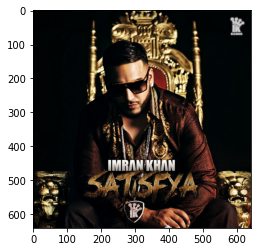

In [ ]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image, ImageOps
print("Cover Art of The First Song")
urllib.request.urlretrieve("https://i.scdn.co/image/ab67616d0000b273164d4ac3f3747a4f873ed5f0", "first_song")
img = PIL.Image.open("first_song")
imga = np.array(img)
plt.figure(figsize=(4,4))
plt.imshow(img)

Our second artist is Joji

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

joji_url = 'spotify:artist:3MZsBdqDrRTJihTHQrO6Dq'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('6873f28e635d4b33bf7c7826dc0228be','71c4fc5bdbc94581aefcef7cce56d033'))
results = spotify.artist_top_tracks(joji_url)
trac=[]
for track in results['tracks'][:10]:
    trac.append(track['name'])
import pandas as pd
artist_df=pd.DataFrame({" Joji's Top Tracks" : trac})
print(artist_df.shape)
artist_df.head()

(10, 1)


,Joji's Top Tracks
0,Glimpse of Us
1,SLOW DANCING IN THE DARK
2,YEAH RIGHT
3,worldstar money (interlude)
4,Sanctuary


In [ ]:
print("Detailed Cover art ad audio links of top tracks of Joji")
for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

Detailed Cover art ad audio links of top tracks
track    : Glimpse of Us
audio    : https://p.scdn.co/mp3-preview/071c22f355ed0d03fdc176dcb25a487f5ffb661c?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b273f798d46201c266747be5db2e

track    : SLOW DANCING IN THE DARK
audio    : https://p.scdn.co/mp3-preview/198e47a60b679b051c8d7a437e53fd3ebe2b58ca?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b27360ba1d6104d0475c7555a6b2

track    : YEAH RIGHT
audio    : https://p.scdn.co/mp3-preview/9a7c809c5cc980d1b4f11f65c2c3471c46680450?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b27360ba1d6104d0475c7555a6b2

track    : worldstar money (interlude)
audio    : https://p.scdn.co/mp3-preview/d0c701dd08d682598352a5af9ed2cc226e53a1b4?cid=6873f28e635d4b33bf7c7826dc0228be
cover art: https://i.scdn.co/image/ab67616d0000b2738e947f66f6d4eeaa56a28767

track    : Sanctuary
audio    : https://p.scdn

Cover art of the first song


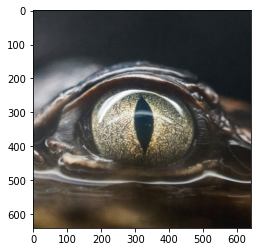

In [ ]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image, ImageOps
print("Cover art of the first song")
urllib.request.urlretrieve("https://i.scdn.co/image/ab67616d0000b273f798d46201c266747be5db2e", "first_song")
img = PIL.Image.open("first_song")
imga = np.array(img)
plt.figure(figsize=(4,4))
plt.imshow(img)

We will get albums od artists.
Our artists are The Neighbourhood and Arijit Singh

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

tnbd_uri = 'spotify:artist:77SW9BnxLY8rJ0RciFqkHh'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('6873f28e635d4b33bf7c7826dc0228be','71c4fc5bdbc94581aefcef7cce56d033'))

results = spotify.artist_albums(tnbd_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Chip Chrome & The Mono-Tones (Deluxe)
Chip Chrome & The Mono-Tones
Hard To Imagine The Neighbourhood Ever Changing
Wiped Out!
#000000 & #FFFFFF
I Love You.
I Love You.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

arijit_uri = 'spotify:artist:4YRxDV8wJFPHPTeXepOstw'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('6873f28e635d4b33bf7c7826dc0228be','71c4fc5bdbc94581aefcef7cce56d033'))

results = spotify.artist_albums(arijit_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

YRF Top 10 - Nightout Sounds
YRF Top 10 - Bollywood Remixed
Pagglait (Original Motion Picture Soundtrack)
YRF Top 10 - Midnight Hour
Ultimate Love Songs - Arijit Singh
Acche Din, Acche Gaane
Groove With Arijit Singh
Chokher Bahire (Original Motion Picture Soundtrack)
Murshida and Other Hits
Yours Truly Arijit
Arijit Singh - Ultimate Love Songs
Shudhu Tomari Jonyo
Khaad
Ghazals By Trending Voices
Golpo Holeo Sotti
Chander Pahar
Goyner Baksho
Bojhena Se Bojhena


We will now enter any artist's Name to get their spotify profile picture

POST MALONE


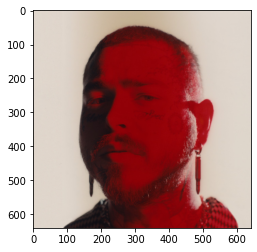

In [ ]:
import sys
import sys
program_name = sys.argv[0]
arguments = sys.argv[1:]
count = len(arguments)
spotify2 = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('6873f28e635d4b33bf7c7826dc0228be','71c4fc5bdbc94581aefcef7cce56d033'))
if count>1:
    name = ' '.join(sys.argv[1:])
else:
    name = 'Post Malone'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
print("POST MALONE")
import PIL
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image, ImageOps
urllib.request.urlretrieve(artist['images'][0]['url'], "img")
img = PIL.Image.open("img")
imga = np.array(img)
plt.figure(figsize=(4,4))
plt.imshow(img)

Let's see the artists who are followed the most!

In [ ]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
60,99799518,90,Ed Sheeran,"['pop', 'uk pop']"
716,65676445,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
748,65146059,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
20,63166304,90,Justin Bieber,"['canadian pop', 'pop']"
954,57382031,89,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
780,55519391,92,Taylor Swift,['pop']
722,52210174,92,BTS,"['k-pop', 'k-pop boy group']"
86,51463191,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
970,46992305,92,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
162,41761135,86,Bruno Mars,"['dance pop', 'pop']"


Let’s see how many genres there are in the track_df data frame:

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

progressive house       162
pop                     153
trance                  141
uplifting trance        119
edm                     115
progressive trance      111
rap                      94
pop dance                93
contemporary country     63
dance pop                60
rock                     59
hip hop                  59
art rock                 55
mellow gold              55
folk rock                52
roots rock               51
pub rock                 51
power pop                51
new wave pop             51
trap                     49
dtype: int64

Now we will use matplotlib to visualise our data

Text(0.5, 1.0, 'Top genres')

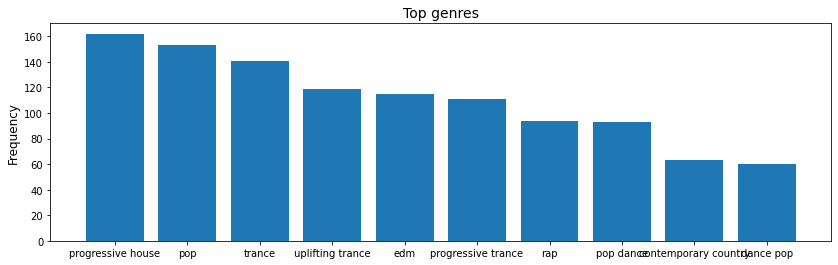

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

We will find top 20 artists sorted by the number of followers for each of top 10 genres:

In [ ]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Ed Sheeran,pop
2,Tiësto,trance
3,Above & Beyond,uplifting trance
4,Marshmello,edm
5,Above & Beyond,progressive trance
6,Drake,rap
7,Marshmello,pop dance
8,Luke Combs,contemporary country
9,Bruno Mars,dance pop


We will find top 20 tracks sorted by popularity for each of top 10 genres:

In [ ]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Sirius (Mixed),36,Armin van Buuren,progressive house
1,Woman,91,Doja Cat,pop
2,The Motto,89,Tiësto,trance
3,Stardust & Madness (Mixed),35,Ilan Bluestone,uplifting trance
4,Where Are You Now,91,Lost Frequencies,edm
5,Stardust & Madness (Mixed),35,Ilan Bluestone,progressive trance
6,Knife Talk (with 21 Savage ft. Project Pat),85,Drake,rap
7,Where Are You Now,91,Lost Frequencies,pop dance
8,Wasted On You,83,Morgan Wallen,contemporary country
9,Woman,91,Doja Cat,dance pop


Visualizing the results with seaborn

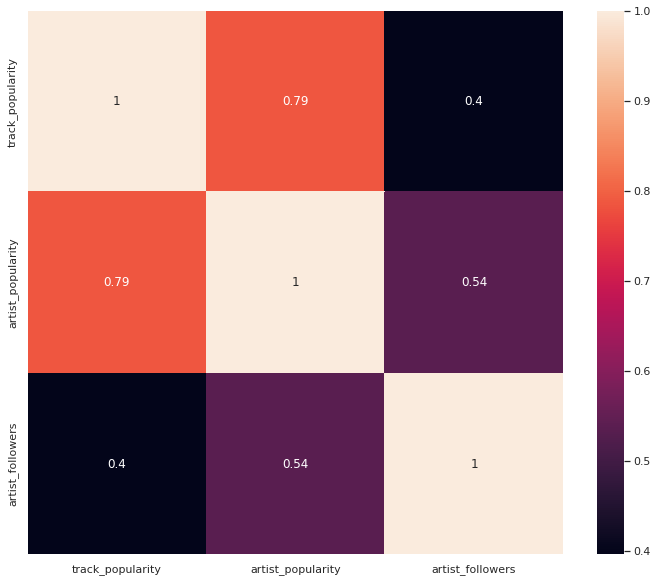

In [ ]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(track_df.corr(), annot=True)
plt.show()

We will get the track recommendations given artist id, genre, and track id. The output is randomised, so Spotify never runs out of content suggestions. For suggestions we are using late Mr.Krishnakumar Kunnath's aka KK's credentials.



In [ ]:
rec = sp.recommendations(seed_artists=["4fEkbug6kZzzJ8eYX6Kbbp"], seed_genres=["bollywood"], seed_tracks=["3HFjh7QljnUCBLsoTwMuTj"], limit=25)
the_artist=[]
the_trac=[]
for track in rec['tracks']:
  the_artist.append(track['artists'][0]['name'])
  the_trac.append(track['name'])
import pandas as pd
recommend_df=pd.DataFrame({"Artist": the_artist,"Song ": the_trac})
print(recommend_df.shape)
recommend_df.head()

(25, 2)


,Artist,Song
0,KK,Aashayein
1,Shafqat Amanat Ali,Darmiyaan
2,Himesh Reshammiya,Hookah Bar
3,Atif Aslam,Pehli Dafa
4,Sachin-Jigar,Saibo
